# Titanic dataset exploration (kaggle)

In [25]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [26]:
df = pd.read_csv('train.csv')
df.Embarked = df.Embarked.astype(dtype='category')

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


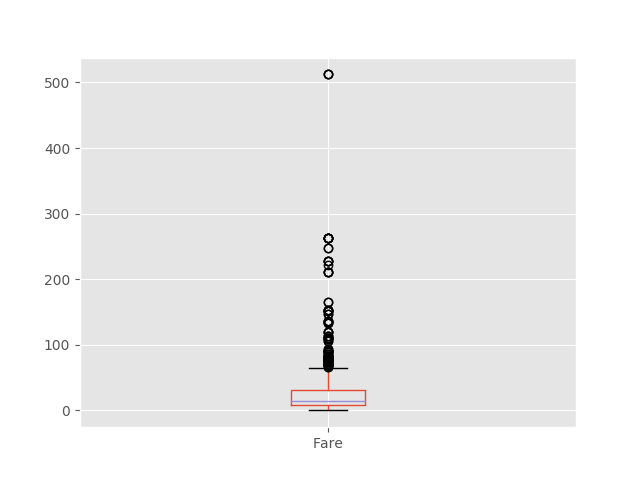

In [30]:
df.Fare.plot(kind="box")

In [31]:
df[df.Fare > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Sex differentiation
## How much male & female survived ?

In [32]:
df.loc[:, ('Sex', 'Survived')].groupby(by='Sex').sum()

,Survived
Sex,
female,233
male,109


In [33]:
df.loc[:, ('PassengerId', 'Sex')].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


In [34]:
(df.loc[:, ('Survived', 'Sex')]
.groupby('Sex').agg([np.sum, len])
.apply(lambda x:
       x['Survived']['sum'] / x['Survived']['len'], axis=1))

Sex
female    0.742038
male      0.188908
dtype: float64

## Viz of age for male & female (boxplots)

<IPython.core.display.Javascript object>


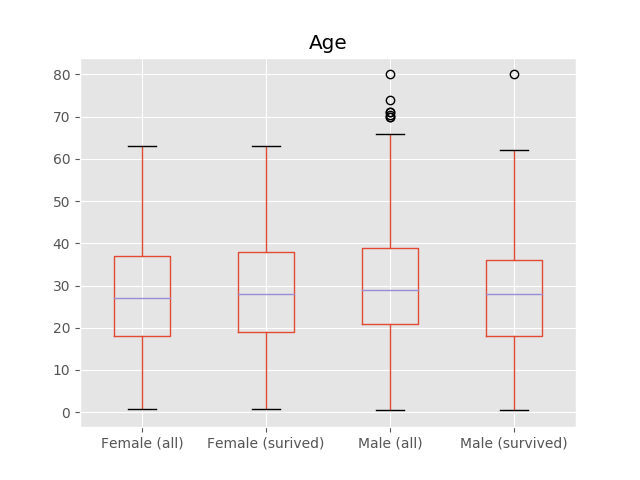

In [35]:
pd.DataFrame({
    'Male (all)': df[df['Sex'].isin(['male'])].loc[:, 'Age'],
    'Male (survived)': df[(df['Sex'].isin(['male'])) & (df['Survived'] == 1)].loc[:, 'Age'],
    'Female (all)': df[df['Sex'].isin(['female'])].loc[:, 'Age'],
    'Female (surived)': df[(df['Sex'].isin(['female'])) & (df['Survived'] == 1)].loc[:, 'Age']
}).plot.box(title='Age')

## How much male & female per class (barplot)

<IPython.core.display.Javascript object>


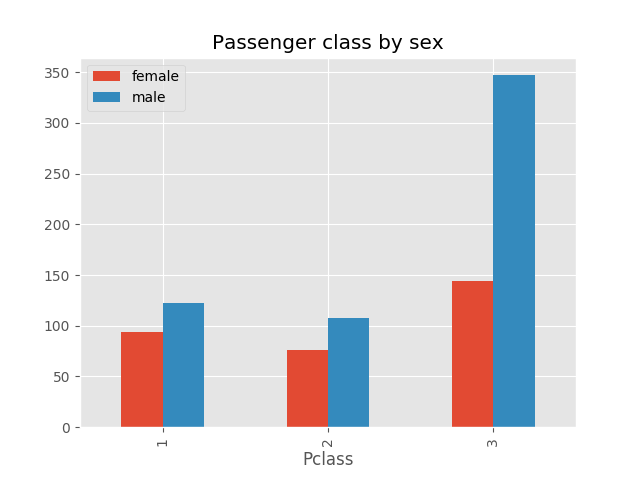

In [36]:
(pd.DataFrame({
    'male': df[df['Sex'].isin(['male'])].groupby('Pclass').agg(len).loc[:, 'PassengerId'],
    'female': df[df['Sex'].isin(['female'])].groupby('Pclass').agg(len).loc[:, 'PassengerId']})
 .plot.bar(title='Passenger class by sex'))

## Ticket fare by class

<IPython.core.display.Javascript object>


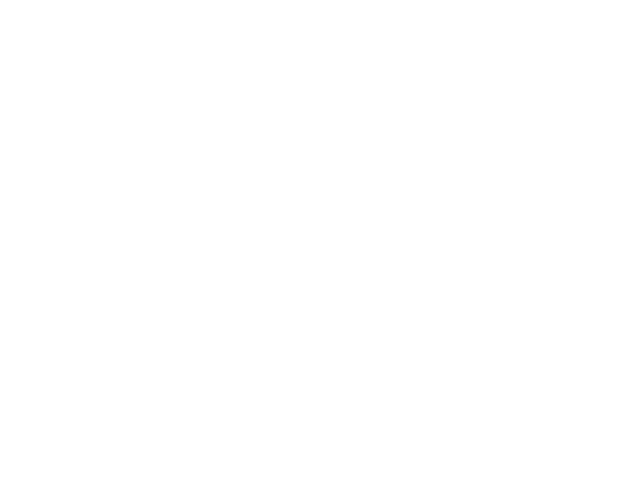

In [13]:
(pd.DataFrame({
    1: df[df['Pclass'] == 1].loc[:, 'Fare'],
    2: df[df['Pclass'] == 2].loc[:, 'Fare'],
    3: df[df['Pclass'] == 3].loc[:, 'Fare']})
 .plot.box())

## How much survived by class (stacked barplots)

<IPython.core.display.Javascript object>


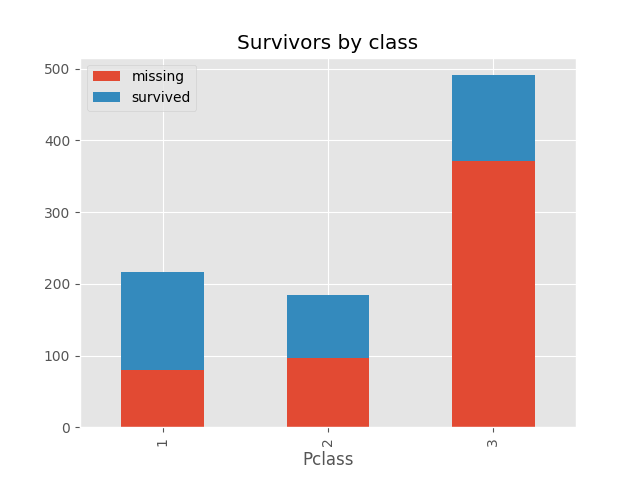

In [37]:
pd.DataFrame({
    'survived': df[df['Survived'] == 1].groupby('Pclass').agg(len).loc[:, 'PassengerId'],
    'missing': df[df['Survived'] == 0].groupby('Pclass').agg(len).loc[:, 'PassengerId']
}).plot.bar(title='Survivors by class', stacked=True)

<IPython.core.display.Javascript object>


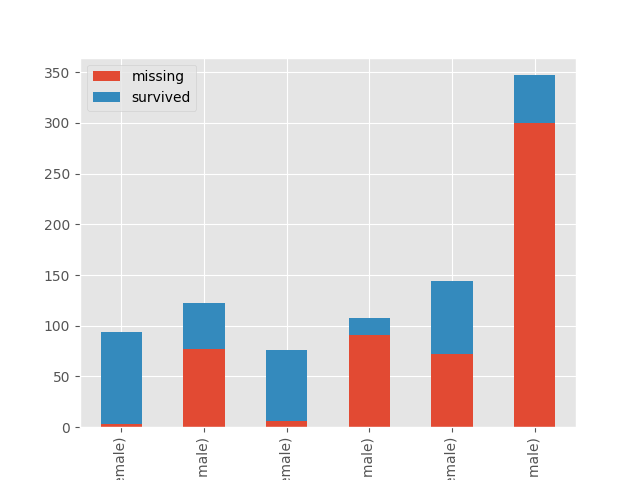

In [38]:
pd.DataFrame({
    'survived': df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).agg(len).loc[:, 'PassengerId'],
    'missing': df[df['Survived'] == 0].groupby(['Pclass', 'Sex']).agg(len).loc[:, 'PassengerId'],
}).plot.bar(stacked=True)

## Age boxplots for each {class, sex, survived}

<IPython.core.display.Javascript object>


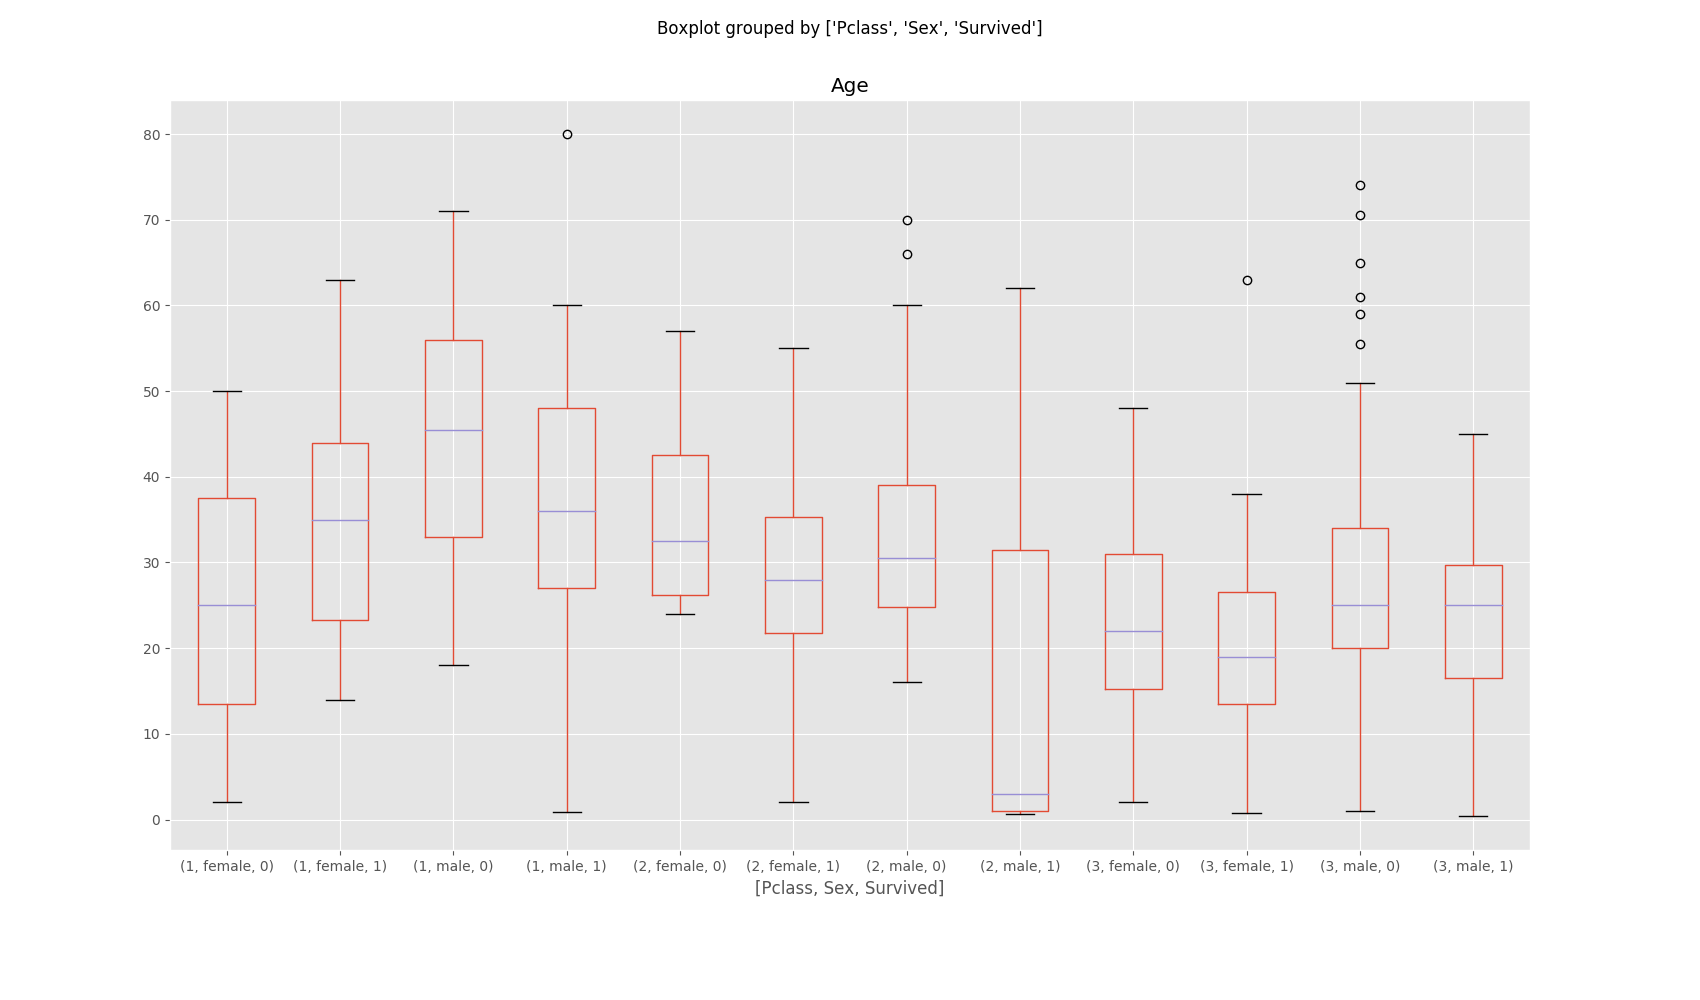

In [39]:
df.boxplot(column='Age', by=['Pclass', 'Sex', 'Survived'], figsize=(17, 10))

<IPython.core.display.Javascript object>


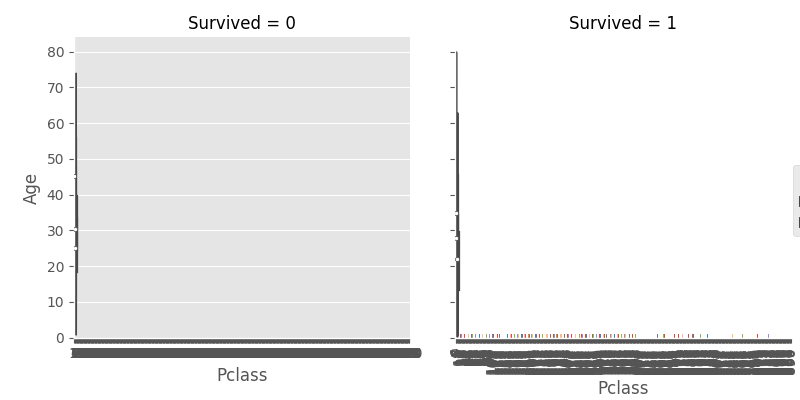

In [21]:
sns.factorplot(x='Pclass', y='Age', hue='Sex', col='Survived', split=True, kind='violin', cut=0, data=df)

## Diff in male / female per embarkation point (barplot)

In [22]:
for sex, infos in df.groupby("Sex"):
        infos.Survived.plot(kind="bar")

In [40]:
homme = df[(df.Sex == "male")]
homme.groupby(['Embarked', 'Survived']).groups

{('C',
  0): Int64Index([ 26,  30,  34,  42,  48,  54,  57,  60,  64,  73,  96, 118, 122,
             130, 135, 139, 155, 174, 181, 203, 244, 273, 285, 292, 295, 296,
             308, 352, 354, 361, 373, 377, 378, 420, 452, 487, 493, 495, 505,
             522, 524, 531, 532, 544, 557, 568, 583, 584, 598, 620, 659, 661,
             685, 693, 698, 731, 766, 773, 789, 793, 798, 817, 832, 843, 847,
             859],
            dtype='int64'),
 ('C',
  1): Int64Index([ 36,  65,  97, 125, 207, 209, 370, 453, 455, 484, 547, 550, 553,
             587, 599, 604, 622, 632, 645, 647, 679, 681, 709, 737, 762, 803,
             827, 839, 889],
            dtype='int64'),
 ('Q',
  0): Int64Index([  5,  16,  46, 116, 126, 143, 171, 188, 196, 214, 245, 260, 278,
             280, 364, 388, 411, 421, 428, 459, 468, 517, 525, 552, 560, 613,
             626, 629, 703, 718, 749, 768, 776, 778, 787, 790, 825, 890],
            dtype='int64'),
 ('Q', 1): Int64Index([301, 510, 828], dtype='int64'),
 

In [41]:
print(homme_c[homme_c.Survived==1].PassengerId.count())
print(homme_c[homme_c.Survived==0].PassengerId.count())

NameError: name 'homme_c' is not defined

In [42]:
males = df[df.Sex == "male"]
malespd = pd.DataFrame({
    'survived': males[males['Survived'] == 1].groupby(['Embarked', 'Sex']).agg(len).loc[:, 'PassengerId'],
    'missing': males[males['Survived'] == 0].groupby(['Embarked', 'Sex']).agg(len).loc[:, 'PassengerId'],
})
females = df[df.Sex == 'female']
femalespd = pd.DataFrame({
    'survived': females[females['Survived'] == 1].groupby(['Embarked', 'Sex']).agg(len).loc[:, 'PassengerId'],
    'missing': females[females['Survived'] == 0].groupby(['Embarked', 'Sex']).agg(len).loc[:, 'PassengerId'],
})


<IPython.core.display.Javascript object>


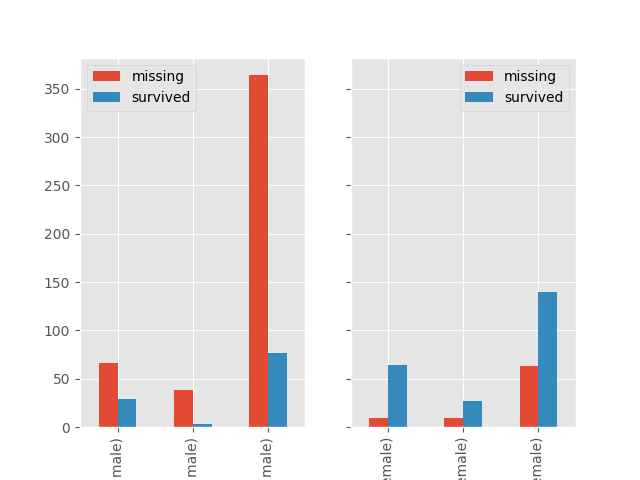

In [43]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
print(axes)
malespd.plot(ax=axes[0], kind='bar')
femalespd.plot(ax=axes[1], kind='bar')

In [ ]:
len(df)